Nama    : Jennifer Ardelia Limicia\
NIM     : 2602105090\
Kelas   : LB09\
Dataset D (Perempuan Genap)

In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [215]:
df = pd.read_csv("data_D.csv")
df

,Unnamed: 0,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,0,106473,15639576,Sarratt,652.0,France,Female,65.0,3,0.00,2,1,1,136592.24,0
1,1,62345,15769582,Hanson,464.0,France,Male,35.0,4,0.00,1,0,0,99505.75,1
2,2,126615,15675888,Austin,620.0,Germany,Female,39.0,6,129401.87,2,1,1,102681.32,1
3,3,35909,15786617,Tuan,598.0,France,Female,30.0,7,0.00,2,1,0,141210.18,0
4,4,45175,15757310,Li Fonti,682.0,Germany,Female,46.0,4,107720.57,1,0,0,93832.33,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41254,41254,105680,15671769,Nkemdirim,567.0,France,Female,37.0,1,121801.49,1,0,0,177028.00,0
41255,41255,70760,15570299,Martin,584.0,Germany,Female,31.0,4,152622.34,1,1,0,99298.80,0
41256,41256,3091,15807593,Tseng,684.0,France,Male,36.0,4,0.00,1,1,0,152992.04,0
41257,41257,20130,15583460,Nwankwo,709.0,France,Male,38.0,3,0.00,2,1,1,185580.23,0


# Check Null Value dan Data Type

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41259 entries, 0 to 41258
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       41259 non-null  int64  
 1   id               41259 non-null  int64  
 2   CustomerId       41259 non-null  int64  
 3   Surname          41259 non-null  object 
 4   CreditScore      41251 non-null  float64
 5   Geography        41259 non-null  object 
 6   Gender           41259 non-null  object 
 7   Age              41259 non-null  float64
 8   Tenure           41259 non-null  int64  
 9   Balance          41259 non-null  float64
 10  NumOfProducts    41259 non-null  int64  
 11  HasCrCard        41259 non-null  int64  
 12  IsActiveMember   41259 non-null  int64  
 13  EstimatedSalary  41259 non-null  float64
 14  churn            41259 non-null  int64  
dtypes: float64(4), int64(8), object(3)
memory usage: 4.7+ MB


In [217]:
df.isna().sum()

Unnamed: 0         0
id                 0
CustomerId         0
Surname            0
CreditScore        8
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
churn              0
dtype: int64

karena missing valuenya sangat sedikit, maka di drop saja

In [218]:
df.dropna(inplace=True)

# Drop column

Column-column yang di drop adalah column-column yang berupa ID dan nama karena tidak akan berpengaruh pada prediksi nantinya. Apabila disertakan dalam modelling nanti, takutnya akan merusak model.

In [219]:
df.drop(['Unnamed: 0', 'id', 'CustomerId', 'Surname'], axis=1, inplace=True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,652.0,France,Female,65.0,3,0.00,2,1,1,136592.24,0
1,464.0,France,Male,35.0,4,0.00,1,0,0,99505.75,1
2,620.0,Germany,Female,39.0,6,129401.87,2,1,1,102681.32,1
3,598.0,France,Female,30.0,7,0.00,2,1,0,141210.18,0
4,682.0,Germany,Female,46.0,4,107720.57,1,0,0,93832.33,1
...,...,...,...,...,...,...,...,...,...,...,...
41254,567.0,France,Female,37.0,1,121801.49,1,0,0,177028.00,0
41255,584.0,Germany,Female,31.0,4,152622.34,1,1,0,99298.80,0
41256,684.0,France,Male,36.0,4,0.00,1,1,0,152992.04,0
41257,709.0,France,Male,38.0,3,0.00,2,1,1,185580.23,0


# Check Duplicate

In [220]:
df.duplicated().sum()

5

In [221]:
df.drop_duplicates(inplace=True)

In [222]:
df.duplicated().sum()

0

# Check unique value

In [223]:
cat = []
num = []

for col in df.columns:
    if df[col].dtype == 'object':
        cat.append(col)
    elif "int" in str(df[col].dtype) or "float" in str(df[col].dtype):
        num.append(col)
        
print(cat)
print(num)

['Geography', 'Gender']
['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'churn']


In [224]:
cat.extend(['Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'churn'])

for i in ['Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'churn']:
    num.remove(i)

print(cat)
print(num)

['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'churn']
['CreditScore', 'Age', 'Balance', 'EstimatedSalary']


In [225]:
for col in cat:
  print('------' + col.upper() + '------')
  print(df[col].value_counts())
  print()

------GEOGRAPHY------
Geography
France     23508
Spain       9080
Germany     8658
Name: count, dtype: int64

------GENDER------
Gender
Male      23160
Female    18086
Name: count, dtype: int64

------TENURE------
Tenure
2     4586
4     4437
7     4431
5     4291
3     4231
8     4230
1     4177
9     4171
6     3969
10    1474
0     1249
Name: count, dtype: int64

------NUMOFPRODUCTS------
NumOfProducts
2    21124
1    19311
3      694
4      117
Name: count, dtype: int64

------HASCRCARD------
HasCrCard
1    31114
0    10132
Name: count, dtype: int64

------ISACTIVEMEMBER------
IsActiveMember
0    20761
1    20485
Name: count, dtype: int64

------CHURN------
churn
0    32531
1     8715
Name: count, dtype: int64



# Check Outlier

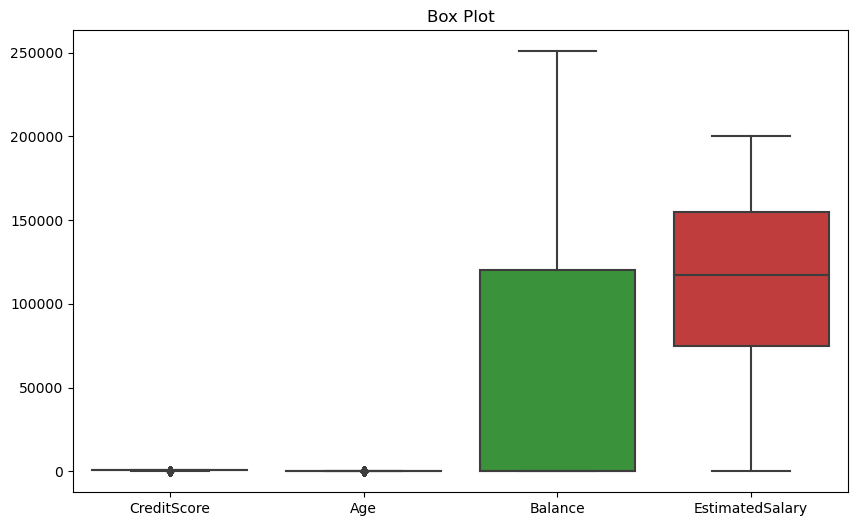

In [226]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[num])
plt.title('Box Plot')
plt.show()

# Check Correlation

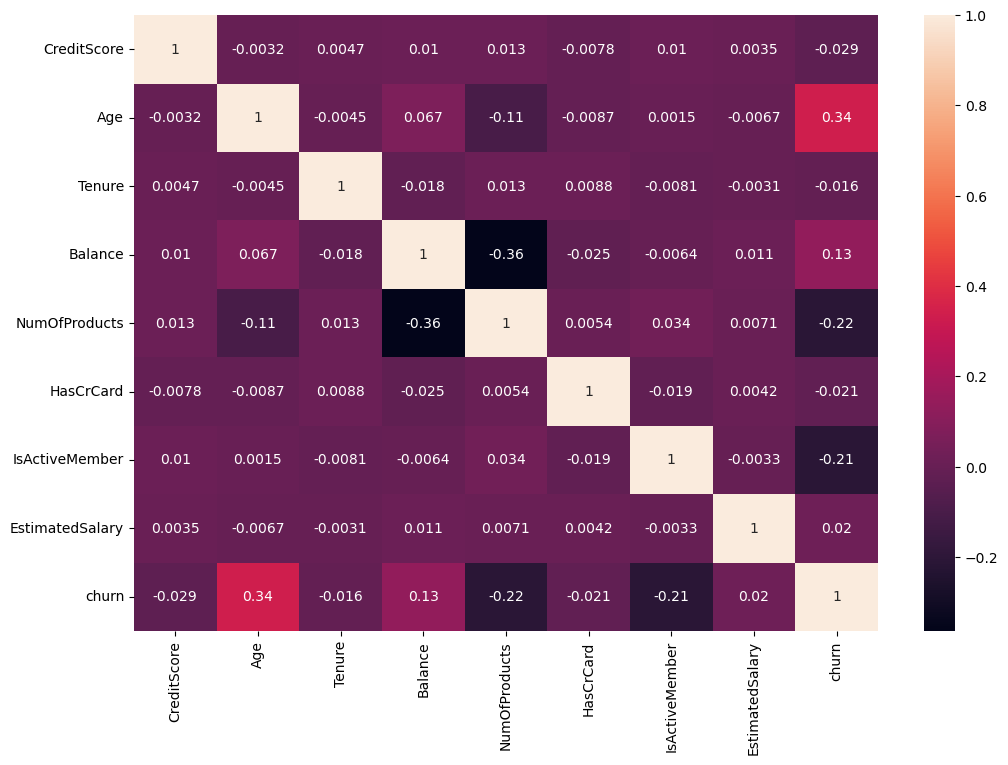

In [227]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(), annot=True)
plt.show()

# Split Data

In [228]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,652.0,France,Female,65.0,3,0.00,2,1,1,136592.24,0
1,464.0,France,Male,35.0,4,0.00,1,0,0,99505.75,1
2,620.0,Germany,Female,39.0,6,129401.87,2,1,1,102681.32,1
3,598.0,France,Female,30.0,7,0.00,2,1,0,141210.18,0
4,682.0,Germany,Female,46.0,4,107720.57,1,0,0,93832.33,1
...,...,...,...,...,...,...,...,...,...,...,...
41254,567.0,France,Female,37.0,1,121801.49,1,0,0,177028.00,0
41255,584.0,Germany,Female,31.0,4,152622.34,1,1,0,99298.80,0
41256,684.0,France,Male,36.0,4,0.00,1,1,0,152992.04,0
41257,709.0,France,Male,38.0,3,0.00,2,1,1,185580.23,0


In [229]:
x = df.drop(['churn'], axis=1)
y = df['churn']

In [230]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(32996, 10) (32996,)
(8250, 10) (8250,)


# Encode

In [231]:
from sklearn.preprocessing import OneHotEncoder

OHE_encode = ['Geography', 'Gender']

for col in OHE_encode:
  encoder = OneHotEncoder(sparse=False, handle_unknown="ignore")
  # Fit and transform the 'Gender' column for each DataFrame
  encoded_train = encoder.fit_transform(x_train[[col]])
  encoded_test = encoder.transform(x_test[[col]])

  columns_to_drop = [col]

  # Reset indices before concatenation
  x_train = x_train.reset_index(drop=True)
  x_test = x_test.reset_index(drop=True)
  x_train = pd.concat([x_train.drop(columns=columns_to_drop), pd.DataFrame(encoded_train, columns=encoder.get_feature_names_out(columns_to_drop))], axis=1)
  x_test = pd.concat([x_test.drop(columns=columns_to_drop), pd.DataFrame(encoded_test, columns=encoder.get_feature_names_out(columns_to_drop))], axis=1)

c:\Users\jenni\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\jenni\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [232]:
x_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,512.0,42.0,6,117436.36,1,1,0,155047.73,1.0,0.0,0.0,1.0,0.0
1,554.0,47.0,8,0.00,1,1,0,74850.97,1.0,0.0,0.0,1.0,0.0
2,835.0,25.0,8,0.00,2,0,0,138882.95,1.0,0.0,0.0,0.0,1.0
3,737.0,27.0,9,71358.71,1,1,0,96792.42,1.0,0.0,0.0,1.0,0.0
4,713.0,36.0,0,0.00,1,0,0,61811.10,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32991,709.0,30.0,1,102050.47,1,1,0,82662.73,1.0,0.0,0.0,1.0,0.0
32992,750.0,39.0,8,134766.85,1,1,0,121789.30,0.0,0.0,1.0,1.0,0.0
32993,641.0,31.0,4,119688.86,2,1,0,77558.28,0.0,0.0,1.0,1.0,0.0
32994,587.0,35.0,7,0.00,3,1,1,53387.90,1.0,0.0,0.0,0.0,1.0


In [233]:
x_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,579.0,31.0,1,90547.48,2,1,1,18800.13,0.0,1.0,0.0,0.0,1.0
1,608.0,33.0,5,96463.15,1,0,1,91564.91,1.0,0.0,0.0,0.0,1.0
2,709.0,29.0,8,0.00,2,0,1,125445.80,1.0,0.0,0.0,1.0,0.0
3,678.0,23.0,8,101960.78,1,1,0,38596.23,1.0,0.0,0.0,0.0,1.0
4,564.0,42.0,4,0.00,2,1,1,93883.53,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8245,791.0,37.0,1,0.00,2,1,0,132973.17,0.0,0.0,1.0,0.0,1.0
8246,649.0,42.0,8,0.00,2,0,1,16287.38,0.0,0.0,1.0,1.0,0.0
8247,737.0,47.0,5,112755.66,1,1,1,92888.52,0.0,1.0,0.0,1.0,0.0
8248,474.0,36.0,8,172321.52,1,1,1,92615.56,1.0,0.0,0.0,0.0,1.0


# Scaling

In [234]:
x_train_scaled, x_test_scaled = x_train.copy(), x_test.copy()

In [235]:
from sklearn.preprocessing import  RobustScaler

continous = ['CreditScore', 'Balance', 'EstimatedSalary', 'Age']

for col in continous:
  scaler = RobustScaler()
  x_train_scaled[col] = scaler.fit_transform(x_train_scaled[col].values.reshape(-1, 1))
  x_test_scaled[col] = scaler.transform(x_test_scaled[col].values.reshape(-1, 1))

In [236]:
x_train_scaled

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,-1.300885,0.5,6,0.977752,1,1,0,0.473553,1.0,0.0,0.0,1.0,0.0
1,-0.929204,1.0,8,0.000000,1,1,0,-0.525606,1.0,0.0,0.0,1.0,0.0
2,1.557522,-1.2,8,0.000000,2,0,0,0.272158,1.0,0.0,0.0,0.0,1.0
3,0.690265,-1.0,9,0.594118,1,1,0,-0.252241,1.0,0.0,0.0,1.0,0.0
4,0.477876,-0.1,0,0.000000,1,0,0,-0.688067,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32991,0.442478,-0.7,1,0.849652,1,1,0,-0.428280,1.0,0.0,0.0,1.0,0.0
32992,0.805310,0.2,8,1.122042,1,1,0,0.059191,0.0,0.0,1.0,1.0,0.0
32993,-0.159292,-0.6,4,0.996506,2,1,0,-0.491876,0.0,0.0,1.0,1.0,0.0
32994,-0.637168,-0.2,7,0.000000,3,1,1,-0.793010,1.0,0.0,0.0,0.0,1.0


In [237]:
x_test_scaled

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,-0.707965,-0.6,1,0.753880,2,1,1,-1.223934,0.0,1.0,0.0,0.0,1.0
1,-0.451327,-0.4,5,0.803133,1,0,1,-0.317369,1.0,0.0,0.0,0.0,1.0
2,0.442478,-0.8,8,0.000000,2,0,1,0.104747,1.0,0.0,0.0,1.0,0.0
3,0.168142,-1.4,8,0.848905,1,1,0,-0.977297,1.0,0.0,0.0,0.0,1.0
4,-0.840708,0.5,4,0.000000,2,1,1,-0.288482,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8245,1.168142,0.0,1,0.000000,2,1,0,0.198529,0.0,0.0,1.0,0.0,1.0
8246,-0.088496,0.5,8,0.000000,2,0,1,-1.255240,0.0,0.0,1.0,1.0,0.0
8247,0.690265,1.0,5,0.938781,1,1,1,-0.300879,0.0,1.0,0.0,1.0,0.0
8248,-1.637168,-0.1,8,1.434715,1,1,1,-0.304279,1.0,0.0,0.0,0.0,1.0


# Modelling

In [238]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

## Random Forest

### Model 1

#### Unscaled

In [239]:
rf1 = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

rf1.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [240]:
rf1_pred = rf1.predict(x_test)
print(classification_report(y_test, rf1_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      6507
           1       0.76      0.50      0.60      1743

    accuracy                           0.86      8250
   macro avg       0.82      0.73      0.76      8250
weighted avg       0.85      0.86      0.85      8250



In [241]:
accuracy = accuracy_score(y_test, rf1_pred)
precision = precision_score(y_test, rf1_pred, average='weighted')
recall = recall_score(y_test, rf1_pred, average='weighted')
f1 = f1_score(y_test, rf1_pred, average='weighted')

print(f'Accuracy = {accuracy}')
print(f'Precision = {precision}')
print(f'Recall = {recall}')
print(f'F1 Score = {f1}')

Accuracy = 0.8614545454545455
Precision = 0.853065690249335
Recall = 0.8614545454545455
F1 Score = 0.8502261241674517


#### Scaled

In [242]:
rf1.fit(x_train_scaled, y_train)
rf1_pred = rf1.predict(x_test_scaled)
print(classification_report(y_test, rf1_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      6507
           1       0.76      0.50      0.61      1743

    accuracy                           0.86      8250
   macro avg       0.82      0.73      0.76      8250
weighted avg       0.85      0.86      0.85      8250



In [243]:
accuracy = accuracy_score(y_test, rf1_pred)
precision = precision_score(y_test, rf1_pred, average='weighted')
recall = recall_score(y_test, rf1_pred, average='weighted')
f1 = f1_score(y_test, rf1_pred, average='weighted')

print(f'Accuracy = {accuracy}')
print(f'Precision = {precision}')
print(f'Recall = {recall}')
print(f'F1 Score = {f1}')

Accuracy = 0.8618181818181818
Precision = 0.8535020067345416
Recall = 0.8618181818181818
F1 Score = 0.8506431834647603


Karena hasil dari kedua model sama, baik yg di scaled dulu datanya maupun yang tidak, ke depannya akan menggunakan data yang di scaled saja

### Model 2

In [244]:
rf2 = RandomForestClassifier(n_estimators=200, max_depth=15, random_state=42, class_weight='balanced')
rf2.fit(x_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=15, n_estimators=200,
                       random_state=42)

In [245]:
rf2_pred = rf2.predict(x_test_scaled)
print(classification_report(y_test, rf1_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      6507
           1       0.76      0.50      0.61      1743

    accuracy                           0.86      8250
   macro avg       0.82      0.73      0.76      8250
weighted avg       0.85      0.86      0.85      8250



In [246]:
accuracy = accuracy_score(y_test, rf2_pred)
precision = precision_score(y_test, rf2_pred, average='weighted')
recall = recall_score(y_test, rf2_pred, average='weighted')
f1 = f1_score(y_test, rf2_pred, average='weighted')

print(f'Accuracy = {accuracy}')
print(f'Precision = {precision}')
print(f'Recall = {recall}')
print(f'F1 Score = {f1}')

Accuracy = 0.8558787878787879
Precision = 0.851561385684023
Recall = 0.8558787878787879
F1 Score = 0.853304735538796


### Grid Search

In [247]:
param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [5, 10, 15],          
    'criterion':['gini', 'entropy', 'log_loss'],
    'class_weight': [None, 'balanced'] 
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='roc_auc', verbose=1, n_jobs=-1)

grid_search.fit(x_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)

best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(x_test_scaled)
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 54 candidates, totalling 162 fits


Best parameters: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 300}
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      6507
           1       0.76      0.50      0.60      1743

    accuracy                           0.86      8250
   macro avg       0.82      0.73      0.76      8250
weighted avg       0.85      0.86      0.85      8250



In [248]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy = {accuracy}')
print(f'Precision = {precision}')
print(f'Recall = {recall}')
print(f'F1 Score = {f1}')

Accuracy = 0.8615757575757576
Precision = 0.8532455658783854
Recall = 0.8615757575757576
F1 Score = 0.8502368790707264


## XGBoost

### Model 1

In [249]:
xgb1 = XGBClassifier(n_estimators=100, max_depth=5)
xgb1.fit(x_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [250]:
xgb1_pred = xgb1.predict(x_test_scaled)
print(classification_report(y_test, rf1_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      6507
           1       0.76      0.50      0.61      1743

    accuracy                           0.86      8250
   macro avg       0.82      0.73      0.76      8250
weighted avg       0.85      0.86      0.85      8250



In [251]:
accuracy = accuracy_score(y_test, xgb1_pred)
precision = precision_score(y_test, xgb1_pred, average='weighted')
recall = recall_score(y_test, xgb1_pred, average='weighted')
f1 = f1_score(y_test, xgb1_pred, average='weighted')

print(f'Accuracy = {accuracy}')
print(f'Precision = {precision}')
print(f'Recall = {recall}')
print(f'F1 Score = {f1}')

Accuracy = 0.8612121212121212
Precision = 0.8532150525709958
Recall = 0.8612121212121212
F1 Score = 0.8543478120872374


### Model 2

In [252]:
xgb2 = XGBClassifier(n_estimators=200, max_depth=6, learning_rate=0.1, reg_alpha=0.1, reg_lambda=0.1)
xgb2.fit(x_train_scaled, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [253]:
xgb2_pred = xgb2.predict(x_test_scaled)
print(classification_report(y_test, rf1_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      6507
           1       0.76      0.50      0.61      1743

    accuracy                           0.86      8250
   macro avg       0.82      0.73      0.76      8250
weighted avg       0.85      0.86      0.85      8250



In [254]:
accuracy = accuracy_score(y_test, xgb2_pred)
precision = precision_score(y_test, xgb2_pred, average='weighted')
recall = recall_score(y_test, xgb2_pred, average='weighted')
f1 = f1_score(y_test, xgb2_pred, average='weighted')

print(f'Accuracy = {accuracy}')
print(f'Precision = {precision}')
print(f'Recall = {recall}')
print(f'F1 Score = {f1}')

Accuracy = 0.8627878787878788
Precision = 0.854696657156923
Recall = 0.8627878787878788
F1 Score = 0.855246057219009


### Grid Search

In [255]:
param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [3, 6, 9],            
    'learning_rate': [0.01, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 1],          
    'reg_lambda': [0, 0.1, 1] 
}

xgb = XGBClassifier()
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='roc_auc', verbose=1, n_jobs=-1)

grid_search.fit(x_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)

best_xgb = grid_search.best_estimator_

y_pred = best_xgb.predict(x_test_scaled)
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 243 candidates, totalling 729 fits


Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'reg_alpha': 1, 'reg_lambda': 1}
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      6507
           1       0.74      0.53      0.62      1743

    accuracy                           0.86      8250
   macro avg       0.81      0.74      0.77      8250
weighted avg       0.85      0.86      0.85      8250



In [256]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy = {accuracy}')
print(f'Precision = {precision}')
print(f'Recall = {recall}')
print(f'F1 Score = {f1}')

Accuracy = 0.8627878787878788
Precision = 0.8544480776294952
Recall = 0.8627878787878788
F1 Score = 0.8539695280594268


best model dari semua percobaan adalah XGBoost yang dituning dengan grid search. Dimana hyper parameternya adalah sebagai berikut:

Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'reg_alpha': 0.1, 'reg_lambda': 0}

# Export XGBoost best model

In [257]:
import pickle
from xgboost import XGBClassifier

# Create XGBoost classifier
model = XGBClassifier( 
    n_estimators=150,
    max_depth=3,
    learning_rate=0.1,
    reg_alpha=0.1,
    reg_lambda=0,
)

# Train the model
model.fit(x_train_scaled, y_train)

# Export the model to a pickle file
filename = 'best_model.pkl'
pickle.dump(model, open(filename, 'wb'))

# load the saved model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test_scaled, y_test)
print(result)


0.8631515151515151
